<a href="https://colab.research.google.com/github/diogoqds/portfolio/blob/master/Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris dataset

O dataset de Iris de Fisher contém dados que foi criado pelo estatístico e biólogo britânico Ronal Fisher em seu artigo O uso de múltiplas medições em problemas taxonômicos em 1936.

Basicamente ele contém 5 colunas sendo elas: ***SepalLengthCm***, ***SepalWidthCm***, ***PetalLengthCm***, ***PetalWidthCm*** e ***Species***, abaixo uma descrição do que é cada coluna

* **SepalLengthCm**: Em português seria algo como comprimento em centimetros da sépala

* **SepalWidthCm**: largura em centimetros da sépala

* **PetalLengthCm**: Em português seria algo como comprimento em centimetros da pétala

* **PetalWidthCm**: largura em centimetros da pétala

* **Species**: existem três tipos de flor de Irís e elas podem ser classificas em  *Iris setosa, Iris virginica e Iris versicolor*

Na imagem abaixo podemos ver o que é a sépala (sepal) e a pétala (petal)

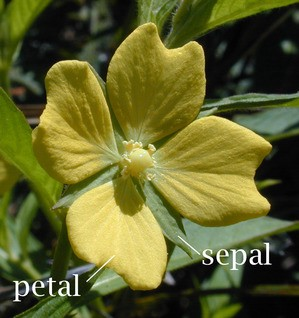

## Objetivo
Nosso objetivo é criar um modelo que dado as dimensões da sépala e da pétala o modelo consiga classficar de qual espécie é essa flor de Iris

## Importando as bibliotecas

O primeiro passo é importar o pandas, que é uma biblioteca do Python muito famosa usada para criar os dataframes, muito usava para fazer análise exploratória dos dados, tratamento de valores faltantes e até mostrar gráficos.



In [1]:
import pandas as pd
import numpy as np

Os algoritmos em geral usam uma seed (semente) que aleatória que fazem com que a cada execução o seu resultado possa mudar, então para evitar isso e manter as nossas métricas sempre com o mesmo valor, eu vou usar o numpy para fixar uma seed, então sempre que eu executar esse notebook os valores do nosso modelo vão ficar estáveis.

In [2]:
np.random.seed(10)

In [3]:
# criando uma variável com o caminho do nosso arquivo csv, estou usando o google colab
# caso esteja rodando localmente ou em outro lugar é importante passar o caminho correto para o csv
file = "/content/Iris.csv"

In [4]:
# lendo o arquivo csv e falando que a coluna Id vai ser o nosso index
df = pd.read_csv(file, index_col="Id")

In [5]:
# vendo os 5 primeiros itens do dataframe
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# vendo o tamanho do dataframe, sendo o primeiro valor o número de linhas (150) e o segundo o número de colunas (5)
df.shape

(150, 5)

In [7]:
# verificando se possui valores nulos, caso tivesse teríamos que fazer algum tratamento para criar e treinar o nosso modelo
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
# verifcando quais as Species que temos nesse dataframe
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Podemos ver que é um dataframe balanceado, temos o mesmo número de dados para cada espécie.


In [9]:
df.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

# Começando a preparar os dados para criar o modelo
Adiantando um pouco alguns passos, para criar o nosso modelo de classificação nós vamos utilizar uma biblioteca chamada sklearn, e como na verdade ela gera modelos matemáticos então precisamos que nossos dados sejam convertido em número, e a nossa coluna Species não atende a esse requisito, então vamos converter para número.

In [10]:
# criando um mapa das Species em texto para números
map_values = { "Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2 }

In [11]:
# criando uma nova coluna no dataframe que vai mapear os valores em texto para valores numéricos
df['species_number'] = df.Species.map(map_values)

In [12]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species_number
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,0
2,4.9,3.0,1.4,0.2,Iris-setosa,0
3,4.7,3.2,1.3,0.2,Iris-setosa,0
4,4.6,3.1,1.5,0.2,Iris-setosa,0
5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [13]:
df.species_number.unique()

array([0, 1, 2])

Como dito anteriormente vamos usar uma biblioteca chamada sklearn, mas para criar o nosso modelo precisamos saber a precisão e acurácia dele, então precisamos ter dados que vamos usar para treinar e dados que vamos usar para testes para saber a qualidade do nosso modelo em classificar.

Para fazer isso vamos usar uma função chamada train_test_split do sklearn model_selection, ela basicamente vai separar os nosso dados em treino e teste.

In [14]:
from sklearn.model_selection import train_test_split


Vamos voltar uma pouco para o nosso ensino fundamental e médio, era bastante comum vermos nas aulas de matématica sobre funções, algo como y = x + 10

Onde dado um valor de x podemos saber o y e com isso plotar gráficos e coisas do tipo. Como dito anteriormente um modelo de classificação na realidade é um modelo matemático e é bastante comum separar nossas variáveis em X e y justamente por isso, sendo X nossas variáveis de entrada e y a nossa variável de saída.


No nosso caso as variáveis de entrada são SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm e o que queremos saber que é a Species.

Estamos fazendo um treinamento supervisionado, então precisamos ter alguns valores de saída (y) para treinar o nosso modelo, e como o nosso dataframe já possui alguns desses valores então vamos usá-los.

In [15]:
# removendo as colunas species_number e Species porque elas são variáveis de saída 
X = df.drop(["species_number", "Species"], axis=1)

# pegando nossa variável numérica species_number
y = df['species_number']

In [16]:
# separando o dataframe em teste e treino sendo que o dataset de teste vai ter 30% do tamanho do dataset original
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


# Como vamos treinar esse modelo?

Para treinar um modelo primeiro é necessário saber o tipo do problema, no nosso caso é um problema de classificação e para isso podemos usar diversos algoritmos de classificação que já estão prontos, para esse primeiro teste vamos usar o algoritmo de árvore de decisão (Decision tree)

## Por que Decision tree? Como funciona?

A Decision tree (árvore de decisão) serve tanto para regressão quanto classificação, ela aprende de acordo com os dados e vai criando ramificações onde dado uma condição ela vai seguindo para um caminho, e é uma excelente forma de classificar e resolver o nosso atual problema.

In [18]:
# importando o DecisionTreeClassificar do sklearn
from sklearn.tree import DecisionTreeClassifier

In [19]:
# criando uma instância do modelo
model = DecisionTreeClassifier()


In [20]:
# treinando o modelo passando os dados de treino
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Após ter um modelo treinado, vamos usar os dados de teste para prever e testar a acurácia do nosso modelo.

In [21]:
predictions = model.predict(X_test)

Agora temos na variável chamada predictions as previsões que nosso modelo fez usando os nossos dados de teste.

A pergunta que temos que nos fazer agora é: como vamos saber se nosso modelo tá acertou? quanto ele tá acertando?

Para isso vamos usar o nosso y_test, porque ele contém os valores reais da classificação daquela Iris.

Para saber a acurácia do nosso modelo vamos importar do skelearn uma função accuracy_score que vai devolver esse valor para gente, o valor vai de 0 até 1.

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
# pegando o valor e multiplicando por 100 para ter em porcentagem
acc = accuracy_score(y_test, predictions) * 100

In [24]:
print(f"A acurácia do modelo é de: {(acc*100):.2f}%")

A acurácia do modelo é de: 9777.78%


Isso significa que nosso modelo acerta em 97.78% das vezes, o que é um valor muito bom, dá pra fazer algumas otimizações e aumentar esse valor, mas é recomendado fazer isso apenas se for trazer um ganho muito alto, pois vai ser necessário um aumento de processamento, tratamento de dados alto para aumentar alguns porcentos da acurácia, o que dependendo do projeto e da empresa pode ser algo que faz sentido e vale a pena, ou que para alguns não faz sentido e pode ser um gasto de recurso.

É possível também visualizar como ficou a nossa árvore, criando um dot e desenhando ele usando as bibliotecas abaixo.

In [25]:
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

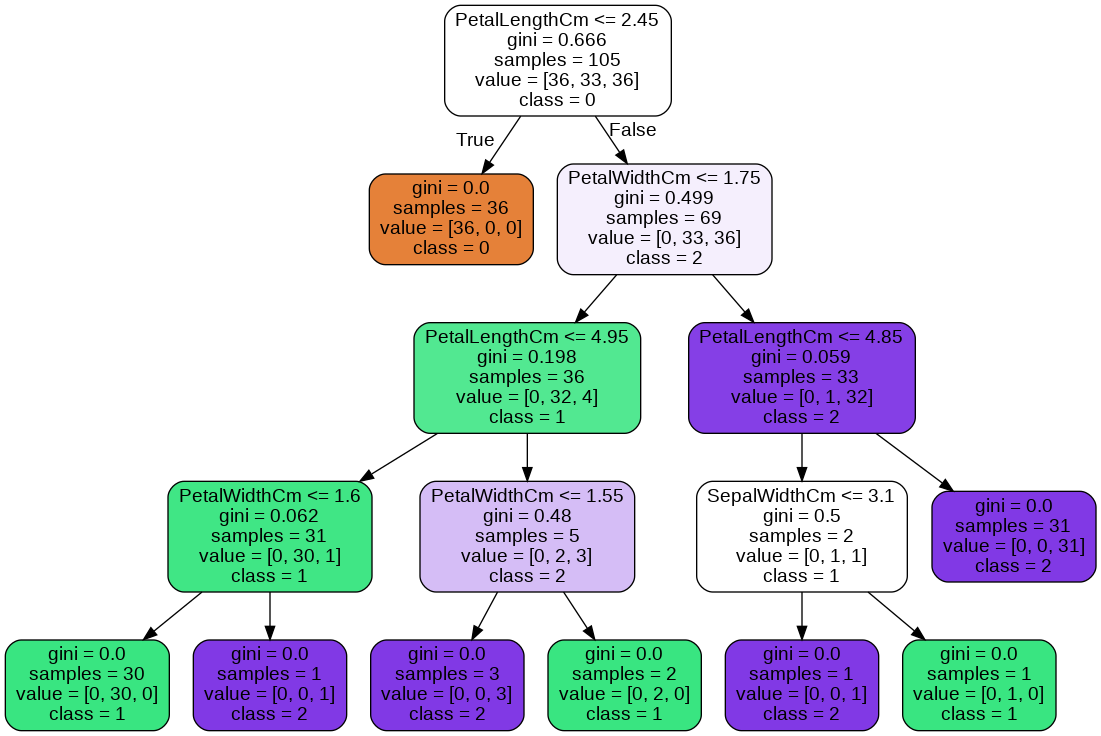

In [26]:
# importar bibliotecas
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# criar DOT 
dot = export_graphviz(model, filled=True, rounded=True,
                      feature_names=X.columns, class_names=['0', '1', '2'])

# # plotar
graph = pydotplus.graph_from_dot_data(dot)  
Image(graph.create_png())

Essa foi a Decision tree gerada, ela possui 4 níveis de profundidade, sendo possível configurar para mais ou para menos, podendo aumentar a complexidade caso aumente a profundidade. Dá para percebe que em alguns nós é dada uma condição e caso atenda essa condição uma ramificação é criada e isso é feito até que se chegue a um resultado e conseguimos classificar os dados (cada cor representa uma espécie, podendo ver pelo atributo class nos retângulos).

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Matriz de Confusão

Uma das principais maneiras de você verificar o desempenho do seu algoritmo é por meio da Matriz de Confusão. Para cada classe, ela informa quais os valores reais e os valores previstos pelo modelo.

Para plotar uma matriz de confusão vamos usar a biblioteca seaborn e matplotlib.

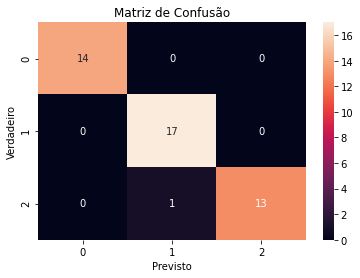

In [28]:
# matriz de confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

Além da acurácia é interessante ver outras métricas para avaliar um modelo de classificação


### Precision

A precisão diz respeito à quantidade (proporcional) de identificações positivas feita corretamente

Ela responde **"qual a proporção de identificações positivas que estava correta?"** Esse valor será máximo (1.0) quando não produzir falsos negativos. 


### *Recall*

Mostra a proporção de positivos encontrados corretamente.

### *F1-score*

É a média harmonica entre precisão e *recall*. O melhor valor possível para
 *F1-score* é 1 e o pior é 0.

O sklearn já ajuda a calcular essas métricas vamos usar o classification_report do pacote metrics

In [29]:
# classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      1.00      0.97        17
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Com isso conseguimos fazer um bom modelo de classificação, com uma boa acurácia e outras boas métricas, atingimos um bom baseline também, podendo melhorar a Decision tree ou até mesmo aplicar um outro algoritmo de classificação para fazer testes e comparar qual o melhor.